# Multiple Linear Regression

Multiple Linear Regression is a technique where multiple independent variables (denoted as `x1`, `x2`, ...) are used to predict a dependent variable (`y`).

In this notebook, we will predict **CO2 Emissions** based on multiple features, including:
- `EngineSize`
- `CYLINDERS`
- `FUELCONSUMPTION_COMB`

Thus, the relationship we are trying to model is:
- **x1** = `EngineSize`
- **x2** = `CYLINDERS`
- **x3** = `FUELCONSUMPTION_COMB`

And we aim to predict:
- **y** = `CO2EMISSIONS`

### Import the packages


In [28]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

### Load the data

In [29]:
df = pd.read_csv("../../data/FuelConsumption.csv")

# display the first few columns of the dataset
df.head()

,Unnamed: 0,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244



## Understand the Data

### `FuelConsumption.csv`:
We have downloaded a fuel consumption dataset, **`FuelConsumption.csv`**, which contains model-specific fuel consumption ratings and estimated carbon dioxide emissions for new light-duty vehicles for retail sale in Canada. [Dataset source](http://open.canada.ca/data/en/dataset/98f1a129-f628-4ce4-b24d-6f16bf24dd64)

- **MODELYEAR** e.g. 2014
- **MAKE** e.g. Acura
- **MODEL** e.g. ILX
- **VEHICLE CLASS** e.g. SUV
- **ENGINE SIZE** e.g. 4.7
- **CYLINDERS** e.g 6
- **TRANSMISSION** e.g. A6
- **FUEL CONSUMPTION in CITY(L/100 km)** e.g. 9.9
- **FUEL CONSUMPTION in HWY (L/100 km)** e.g. 8.9
- **FUEL CONSUMPTION COMB (L/100 km)** e.g. 9.2
- **CO2 EMISSIONS (g/km)** e.g. 182   --> low --> 0


Let's select some features that we want to use for regression.


In [30]:
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.head(9)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,9.9,6.7,8.5,196
1,2.4,4,11.2,7.7,9.6,221
2,1.5,4,6.0,5.8,5.9,136
3,3.5,6,12.7,9.1,11.1,255
4,3.5,6,12.1,8.7,10.6,244
5,3.5,6,11.9,7.7,10.0,230
6,3.5,6,11.8,8.1,10.1,232
7,3.7,6,12.8,9.0,11.1,255
8,3.7,6,13.4,9.5,11.6,267


### Visualizations

Plotting __ENGINESIZE__ vs Emissions 

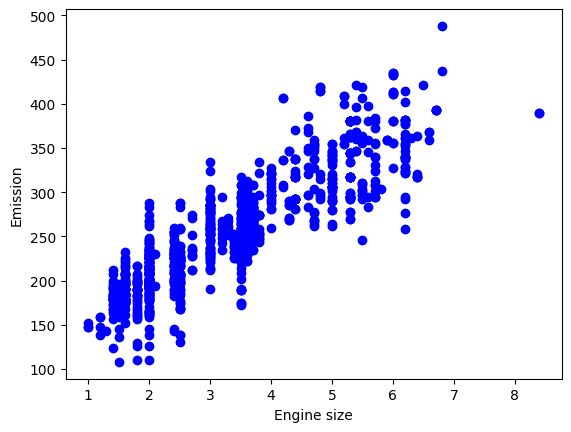

In [31]:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

Plotting __FUELCONSUMPTION_COMB__ vs the Emission:

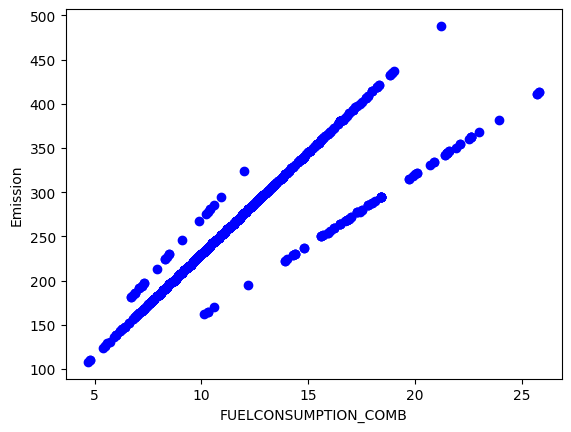

In [32]:
plt.scatter(cdf.FUELCONSUMPTION_COMB, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("FUELCONSUMPTION_COMB")
plt.ylabel("Emission")
plt.show()

Plotting __CYLINDERS__ vs the Emission:

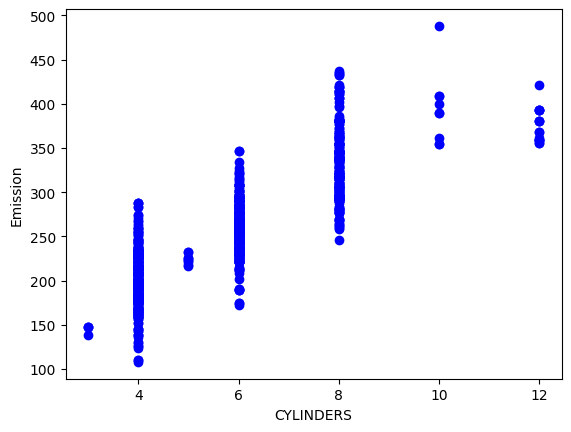

In [33]:
plt.scatter(cdf.CYLINDERS, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("CYLINDERS")
plt.ylabel("Emission")
plt.show()

### Train and Test Dataset Split

When building a machine learning model, it is important to evaluate how well it performs on new, unseen data. Train/Test Split involves splitting the dataset into training and testing sets that are mutually exclusive. To do this, we split our dataset into two parts:

**Training Set**: Used to train the model.

**Testing Set**: Used to test how well the model performs on data it has not seen before.

By doing this split, we get a better understanding of how well the model generalizes to new data, as the testing set acts like "new" data that the model has never encountered during training (**out-of-sample accuracy**). This helps us measure the model’s accuracy and reliability.

For example, we can split our dataset so that 80% is used for training and 20% is used for testing. To do this, we use a simple method to randomly select rows for each set. One common approach is to use the __np.random.rand()__ function from the NumPy library to create a random mask for splitting the data.

In [38]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

#### Train data distribution


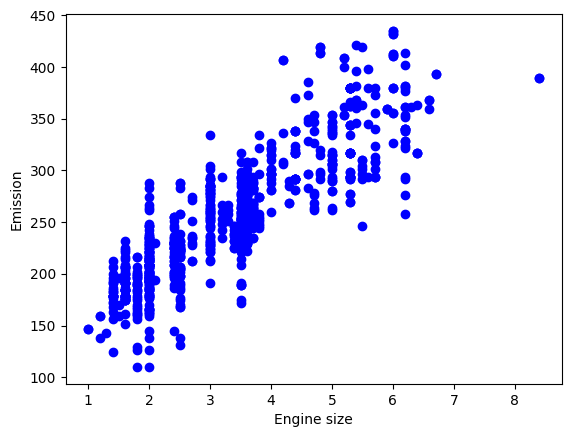

In [35]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

<h2 id="multiple_regression_model">Multiple Regression Model</h2>


In real life, many factors can affect CO2 emissions. When we use more than one factor (or variable) to predict CO2 emissions, this is called multiple linear regression. For example, we can predict CO2 emissions based on car features like `Fuel Consumption`, `Engine Size`, and `Number of Cylinders`.

The great thing is that multiple linear regression is just an extension of simple linear regression, where instead of using just one factor, we use several factors to make our prediction.

In [36]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
x = np.asanyarray(train[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
y = np.asanyarray(train[['CO2EMISSIONS']])
regr.fit (x, y)

# The coefficients
print ('Coefficients: ', regr.coef_)

Coefficients:  [[ 8.9639036   7.95452986 10.24587464]]


The **coefficient** and **intercept** are the key parameters of the fitted line. In multiple linear regression with 3 features, these parameters define the hyperplane that best fits the data. `Scikit-learn` can estimate these parameters for us using the data. It uses a method called Ordinary Least Squares (OLS) to find the best-fit line.

### Ordinary Least Squares (OLS)
OLS is a method used to estimate the unknown parameters in a linear regression model. It works by finding the values for the parameters that minimize the difference between the actual values (y) and the predicted values ($\hat{y}$).

In simple terms, OLS tries to make the predictions as close as possible to the real values by minimizing the error (the difference between the actual and predicted values). It does this by:

- Minimizing the sum of squared errors (SSE), or the mean squared error (MSE), between the real and predicted values across all data points.
OLS can find the best parameters in two ways:

- Solving the equations directly (called closed-form solutions).

- Using optimization methods like Gradient Descent or other algorithms to find the best-fit parameters.

<h2 id="prediction">Prediction</h2>


In [37]:
y_hat= regr.predict(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
x = np.asanyarray(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
y = np.asanyarray(test[['CO2EMISSIONS']])
print("Mean Squared Error (MSE) : %.2f"% np.mean((y_hat - y) ** 2))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(x, y))

Mean Squared Error (MSE) : 586.08
Variance score: 0.86


/opt/homebrew/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


### Explained Variance Regression Score:

The **explained variance score** measures how well the regression model has explained the variance in the target variable. 

The formula for explained variance is:

$\texttt{explainedVariance}(y, \hat{y}) = 1 - \frac{Var\{ y - \hat{y}\}}{Var\{y\}}$  


Let:
- $\hat{y}$ be the predicted target output (from the model).
- y be the actual target output.
- $\text{Var}$ represent the variance (the square of the standard deviation).


In simple terms:
- **Explained variance** tells us how much of the variation in the actual values can be explained by the model’s predictions.
- A score of **1.0** means the model perfectly explains all the variance, which is the best possible score.
- Lower values indicate that the model is not doing well in explaining the variance in the data.

This score helps us understand how well the model captures the patterns in the data.
